In [79]:
import itertools
import numpy as np
import pandas as pd
import nltk

from sklearn.feature_extraction import DictVectorizer
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

In [2]:
train = pd.read_csv('train.csv')

In [23]:
test = pd.read_csv('test.csv')

In [3]:
train.shape

(4543833, 5)

In [4]:
train.head()

,id,Doc_ID,Sent_ID,Word,tag
0,1,1,1,Obesity,O
1,2,1,1,in,O
2,3,1,1,Low-,O
3,4,1,1,and,O
4,5,1,1,Middle-Income,O


In [11]:
train.tail()

,id,Doc_ID,Sent_ID,Word,tag
4543828,4543829,30000,191282,translational,O
4543829,4543830,30000,191282,or,O
4543830,4543831,30000,191282,post-translational,O
4543831,4543832,30000,191282,level,O
4543832,4543833,30000,191282,.,O


In [5]:
len(train['Doc_ID'].unique())

30000

In [6]:
len(train['Sent_ID'].unique())

191282

In [7]:
train['tag'].value_counts()

O                4446206
B-indications      53003
I-indications      44624
Name: tag, dtype: int64

In [21]:
train[pd.isna(train['Word'])].shape

(130, 5)

In [24]:
train['Word'].fillna('none', inplace=True)
test['Word'].fillna('none', inplace=True)

## Get POS tags

In [25]:
pos_tags_df = []

for ctr,sent_id in enumerate(train['Sent_ID'].unique()):
    if ctr % 1000 == 0:
        print(ctr)

    full_sentence = train[train['Sent_ID'] == sent_id]['Word']
    try:
        pos_tags = nltk.pos_tag(full_sentence)
    except Exception as e:
        print(f'Error in sent_id: {sent_id}')
        print(e)
        continue
    actual_tags = [x[1] for x in pos_tags]
    pos_tags_df += actual_tags

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
40000
41000
42000
43000
44000
45000
46000
47000
48000
49000
50000
51000
52000
53000
54000
55000
56000
57000
58000
59000
60000
61000
62000
63000
64000
65000
66000
67000
68000
69000
70000
71000
72000
73000
74000
75000
76000
77000
78000
79000
80000
81000
82000
83000
84000
85000
86000
87000
88000
89000
90000
91000
92000
93000
94000
95000
96000
97000
98000
99000
100000
101000
102000
103000
104000
105000
106000
107000
108000
109000
110000
111000
112000
113000
114000
115000
116000
117000
118000
119000
120000
121000
122000
123000
124000
125000
126000
127000
128000
129000
130000
131000
132000
133000
134000
135000
136000
137000
138000
139000
140000
141000
142000
143000
144000
145000
146000
147000
148000
149000
150000
151000
152000
153000
154000
155000
156000
157000
158000


In [27]:
train['pos_tags'] = pos_tags_df

In [28]:
len(test['Sent_ID'].unique())

125840

In [29]:
pos_tags_df = []

for ctr,sent_id in enumerate(test['Sent_ID'].unique()):
    if ctr % 1000 == 0:
        print(ctr)

    full_sentence = test[test['Sent_ID'] == sent_id]['Word']
    try:
        pos_tags = nltk.pos_tag(full_sentence)
    except Exception as e:
        print(f'Error in sent_id: {sent_id}')
        print(e)
        continue
    actual_tags = [x[1] for x in pos_tags]
    pos_tags_df += actual_tags

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
40000
41000
42000
43000
44000
45000
46000
47000
48000
49000
50000
51000
52000
53000
54000
55000
56000
57000
58000
59000
60000
61000
62000
63000
64000
65000
66000
67000
68000
69000
70000
71000
72000
73000
74000
75000
76000
77000
78000
79000
80000
81000
82000
83000
84000
85000
86000
87000
88000
89000
90000
91000
92000
93000
94000
95000
96000
97000
98000
99000
100000
101000
102000
103000
104000
105000
106000
107000
108000
109000
110000
111000
112000
113000
114000
115000
116000
117000
118000
119000
120000
121000
122000
123000
124000
125000


In [30]:
test['pos_tags'] = pos_tags_df

In [31]:
train['pos_tags'].value_counts()

NN      875656
IN      554222
JJ      506597
DT      338489
NNS     330879
NNP     310026
.       188445
,       166125
CC      160980
CD      134257
VBN     131055
VBD     117892
RB       94977
)        79413
(        78810
TO       70373
VB       66757
VBG      62969
VBZ      59417
VBP      48129
:        27830
PRP      23688
MD       18388
WDT      15132
JJR      13921
PRP$     13704
FW       10899
POS       6337
WRB       5781
''        5453
RBR       4852
JJS       4369
WP        3635
EX        3588
RBS       2107
``        2094
$         2001
RP        1612
NNPS      1585
PDT        727
WP$        321
#          168
UH         138
SYM         27
LS           8
Name: pos_tags, dtype: int64

## Modelling

In [36]:
train.to_pickle('train_df.pkl')
test.to_pickle('test_df.pkl')

In [33]:
train.shape

(4543833, 6)

In [34]:
train.head()

,id,Doc_ID,Sent_ID,Word,tag,pos_tags
0,1,1,1,Obesity,O,NN
1,2,1,1,in,O,IN
2,3,1,1,Low-,O,NNP
3,4,1,1,and,O,CC
4,5,1,1,Middle-Income,O,JJ


In [38]:
import sklearn_crfsuite
from sklearn_crfsuite import scorers
from sklearn_crfsuite import metrics
from collections import Counter

In [41]:
class SentenceGetter(object):
    def __init__(self, data):
        self.n_sent = 1
        self.data = data
        self.empty = False
        agg_func = lambda s: [(w, p, t) for w, p, t in zip(s['Word'].values.tolist(), 
                                                           s['pos_tags'].values.tolist(), 
                                                           s['tag'].values.tolist())]
        self.grouped = self.data.groupby('Sent_ID').apply(agg_func)
        self.sentences = [s for s in self.grouped]
        
    def get_next(self):
        try: 
            s = self.grouped['Sentence: {}'.format(self.n_sent)]
            self.n_sent += 1
            return s 
        except:
            return None

In [42]:
getter = SentenceGetter(train)
sentences = getter.sentences

In [43]:
len(sentences)

191282

In [44]:
sentences[0]

[('Obesity', 'NN', 'O'),
 ('in', 'IN', 'O'),
 ('Low-', 'NNP', 'O'),
 ('and', 'CC', 'O'),
 ('Middle-Income', 'JJ', 'O'),
 ('Countries', 'NNS', 'O'),
 (':', ':', 'O'),
 ('Burden', 'NNP', 'O'),
 (',', ',', 'O'),
 ('Drivers', 'NNP', 'O'),
 (',', ',', 'O'),
 ('and', 'CC', 'O'),
 ('Emerging', 'NNP', 'O'),
 ('Challenges', 'NNP', 'O'),
 ('.', '.', 'O')]

In [45]:
def word2features(sent, i):
    word = sent[i][0]
    postag = sent[i][1]
    
    features = {
        'bias': 1.0, 
        'word.lower()': word.lower(), 
        'word[-3:]': word[-3:],
        'word[-2:]': word[-2:],
        'word.isupper()': word.isupper(),
        'word.istitle()': word.istitle(),
        'word.isdigit()': word.isdigit(),
        'postag': postag,
        'postag[:2]': postag[:2],
    }
    if i > 0:
        word1 = sent[i-1][0]
        postag1 = sent[i-1][1]
        features.update({
            '-1:word.lower()': word1.lower(),
            '-1:word.istitle()': word1.istitle(),
            '-1:word.isupper()': word1.isupper(),
            '-1:postag': postag1,
            '-1:postag[:2]': postag1[:2],
        })
    else:
        features['BOS'] = True

    if i < len(sent)-1:
        word1 = sent[i+1][0]
        postag1 = sent[i+1][1]
        features.update({
            '+1:word.lower()': word1.lower(),
            '+1:word.istitle()': word1.istitle(),
            '+1:word.isupper()': word1.isupper(),
            '+1:postag': postag1,
            '+1:postag[:2]': postag1[:2],
        })
    else:
        features['EOS'] = True

    return features

In [46]:
def sent2features(sent):
    return [word2features(sent, i) for i in range(len(sent))]

def sent2labels(sent):
    return [label for token, postag, label in sent]

def sent2tokens(sent):
    return [token for token, postag, label in sent]

### Split train and test sets

In [47]:
X = [sent2features(s) for s in sentences]
y = [sent2labels(s) for s in sentences]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

### Train a CRF model

In [59]:
crf = sklearn_crfsuite.CRF(
    algorithm='lbfgs',
    c1=0.1,
    c2=0.1,
    max_iterations=100,
    all_possible_transitions=True
)
crf.fit(X_train, y_train)

CRF(algorithm='lbfgs', all_possible_states=None,
  all_possible_transitions=True, averaging=None, c=None, c1=0.1, c2=0.1,
  calibration_candidates=None, calibration_eta=None,
  calibration_max_trials=None, calibration_rate=None,
  calibration_samples=None, delta=None, epsilon=None, error_sensitive=None,
  gamma=None, keep_tempfiles=None, linesearch=None, max_iterations=100,
  max_linesearch=None, min_freq=None, model_filename=None,
  num_memories=None, pa_type=None, period=None, trainer_cls=None,
  variance=None, verbose=False)

### Evaluation

In [60]:
y_pred = crf.predict(X_test)

NameError: name 'new_classes' is not defined

In [63]:
print(metrics.flat_classification_report(y_test, y_pred, labels=np.unique(train.tag.values)))

               precision    recall  f1-score   support

B-indications       0.86      0.75      0.80     17530
I-indications       0.82      0.75      0.78     14733
            O       1.00      1.00      1.00   1464757

    micro avg       0.99      0.99      0.99   1497020
    macro avg       0.89      0.83      0.86   1497020
 weighted avg       0.99      0.99      0.99   1497020



### On total

In [67]:
final_crf = sklearn_crfsuite.CRF(
    algorithm='lbfgs',
    c1=0.1,
    c2=0.1,
    max_iterations=100,
    all_possible_transitions=True
)
final_crf.fit(X, y)

CRF(algorithm='lbfgs', all_possible_states=None,
  all_possible_transitions=True, averaging=None, c=None, c1=0.1, c2=0.1,
  calibration_candidates=None, calibration_eta=None,
  calibration_max_trials=None, calibration_rate=None,
  calibration_samples=None, delta=None, epsilon=None, error_sensitive=None,
  gamma=None, keep_tempfiles=None, linesearch=None, max_iterations=100,
  max_linesearch=None, min_freq=None, model_filename=None,
  num_memories=None, pa_type=None, period=None, trainer_cls=None,
  variance=None, verbose=False)

In [71]:
test['tag'] = ''
getter = SentenceGetter(test)
test_sentences = getter.sentences
test_X = [sent2features(s) for s in test_sentences]
test_y = [sent2labels(s) for s in test_sentences]

In [74]:
preds = crf.predict(test_X)

In [76]:
preds[0]

['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']

In [80]:
preds_list = list(itertools.chain.from_iterable(preds))

In [78]:
test.shape

(2994463, 6)

In [81]:
len(preds_list)

2994463

In [85]:
submission_df = pd.DataFrame()
submission_df['id'] = test['id']
submission_df['Sent_ID'] = test['Sent_ID']
submission_df['tag'] = preds_list
submission_df.to_csv('submission_1.csv', index=False)

## bidirectional-lstm

In [86]:
getter = SentenceGetter(train)
sentences = getter.sentences

In [87]:
print(sentences[0:1])

[[('Obesity', 'NN', 'O'), ('in', 'IN', 'O'), ('Low-', 'NNP', 'O'), ('and', 'CC', 'O'), ('Middle-Income', 'JJ', 'O'), ('Countries', 'NNS', 'O'), (':', ':', 'O'), ('Burden', 'NNP', 'O'), (',', ',', 'O'), ('Drivers', 'NNP', 'O'), (',', ',', 'O'), ('and', 'CC', 'O'), ('Emerging', 'NNP', 'O'), ('Challenges', 'NNP', 'O'), ('.', '.', 'O')]]


In [88]:
maxlen = max([len(s) for s in sentences])
print ('Maximum sequence length:', maxlen)

Maximum sequence length: 3899


In [103]:
# Check how long sentences are so that we can pad them
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("ggplot")

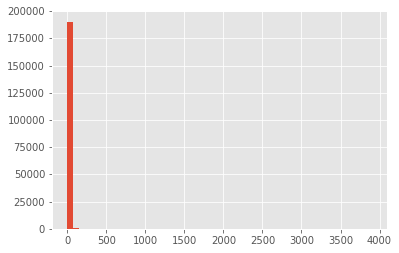

In [104]:
plt.hist([len(s) for s in sentences], bins=50)
plt.show()

In [106]:
words = list(set(train["Word"].values))
words.append("ENDPAD")

In [108]:
n_words = len(words)

In [109]:
tags = list(set(train["tag"].values))

In [110]:
n_tags = len(tags)

### Converting words to numbers and numbers to words

In [112]:
word2idx = {w: i for i, w in enumerate(words)}
tag2idx = {t: i for i, t in enumerate(tags)}

In [114]:
from keras.preprocessing.sequence import pad_sequences
X = [[word2idx[w[0]] for w in s] for s in sentences]

Using TensorFlow backend.


In [121]:
X = pad_sequences(maxlen=maxlen, sequences=X, padding="post",value=n_words - 1)

In [116]:
y = [[tag2idx[w[2]] for w in s] for s in sentences]

In [122]:
y = pad_sequences(maxlen=maxlen, sequences=y, padding="post", value=tag2idx["O"])

In [123]:
from keras.utils import to_categorical
y = [to_categorical(i, num_classes=n_tags) for i in y]

In [124]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

In [125]:
from keras.models import Model, Input
from keras.layers import LSTM, Embedding, Dense, TimeDistributed, Dropout, Bidirectional

In [126]:
input = Input(shape=(maxlen,))
model = Embedding(input_dim=n_words, output_dim=maxlen, input_length=maxlen)(input)
model = Dropout(0.1)(model)
model = Bidirectional(LSTM(units=100, return_sequences=True, recurrent_dropout=0.1))(model)
out = TimeDistributed(Dense(n_tags, activation="softmax"))(model)  # softmax output layer

In [127]:
model = Model(input, out)

In [130]:
import keras.backend as K

def f1_score(y_true, y_pred):

    # Count positive samples.
    c1 = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    c2 = K.sum(K.round(K.clip(y_pred, 0, 1)))
    c3 = K.sum(K.round(K.clip(y_true, 0, 1)))

    # If there are no true samples, fix the F1 score at 0.
    if c3 == 0:
        return 0

    # How many selected items are relevant?
    precision = c1 / c2

    # How many relevant items are selected?
    recall = c1 / c3

    # Calculate f1_score
    f1_score = 2 * (precision * recall) / (precision + recall)
    return f1_score

In [131]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy", f1_score])

In [ ]:
history = model.fit(X_train, np.array(y_train), batch_size=32, epochs=1, validation_split=0.2, verbose=1)

/Users/shashankwadhwa/Desktop/Work/env/ds3/lib/python3.6/site-packages/tensorflow/python/ops/gradients_impl.py:109: UserWarning: Converting sparse IndexedSlices to a dense Tensor with 719388894 elements. This may consume a large amount of memory.
  num_elements)


Train on 102526 samples, validate on 25632 samples
Epoch 1/1


In [1]:
train['tag']

NameError: name 'train' is not defined